## Homework 1

In [1]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
import tensorflow as tf
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 6]

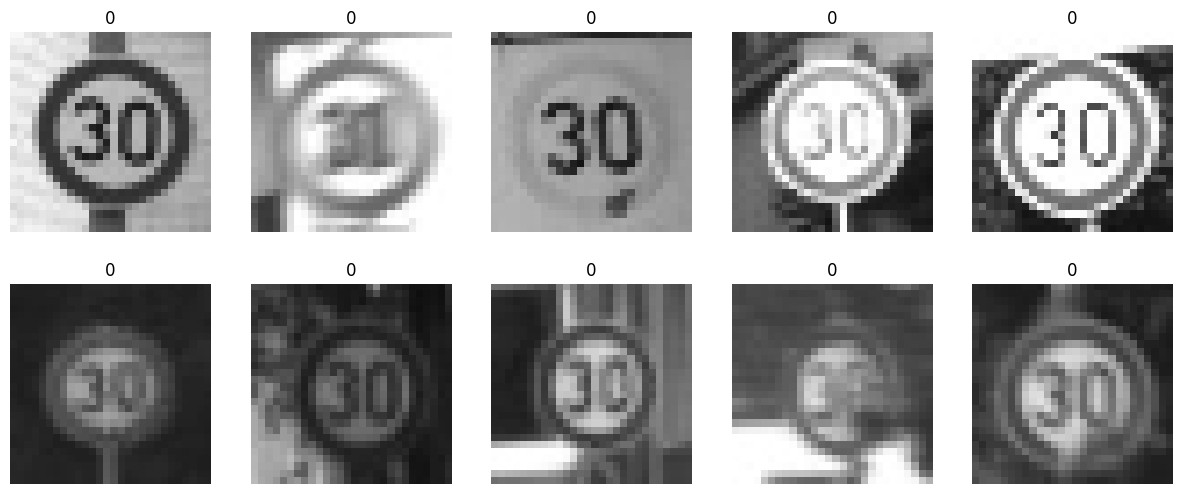

In [2]:
folder = 'subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

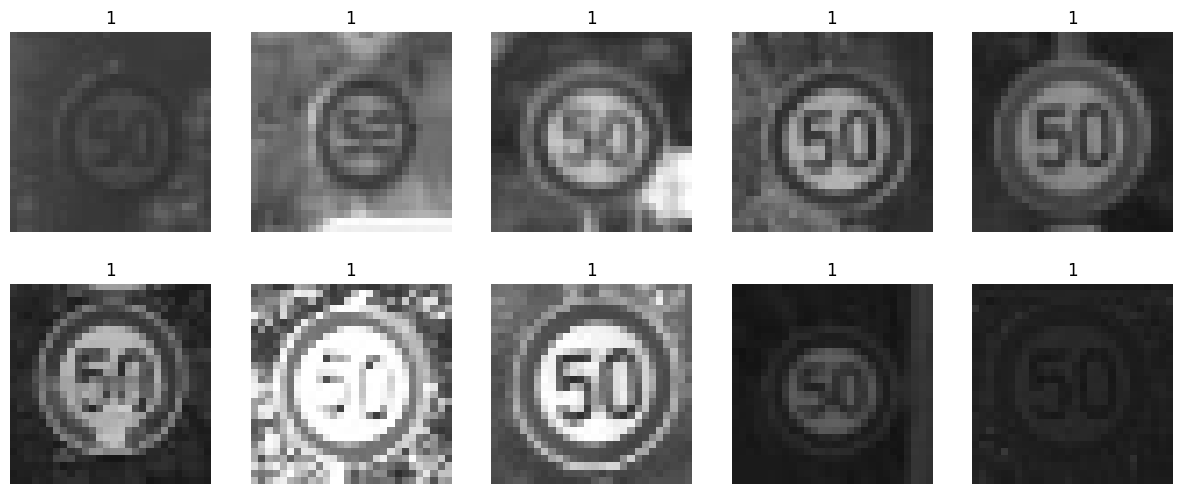

In [3]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [4]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [5]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [6]:
from time import time

start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.023972034454345703


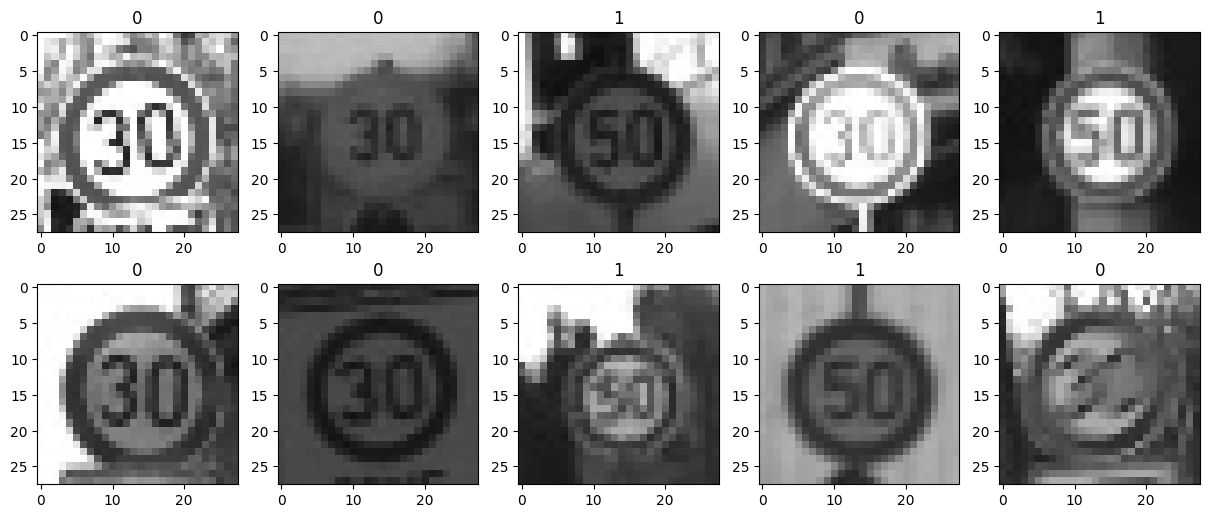

In [7]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [8]:
inputs = Input(shape=(pixels.shape[1],))
dense1 = Dense(10, activation="linear")(inputs)
outputs = Dense(1, activation="linear")(dense1)  # Змінити на 1 нейрон
model = Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 7861 (30.71 KB)
Trainable params: 7861 (30.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


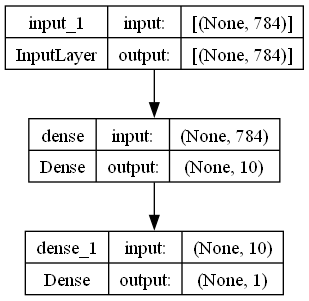

In [9]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [10]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [11]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 [==============================] - 1s 1ms/step - loss: 0.2578
Epoch 2/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1593
Epoch 3/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1271
Epoch 4/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1110
Epoch 5/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1039
Epoch 6/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0970
Epoch 7/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0930
Epoch 8/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1099
Epoch 9/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0900
Epoch 10/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0994


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

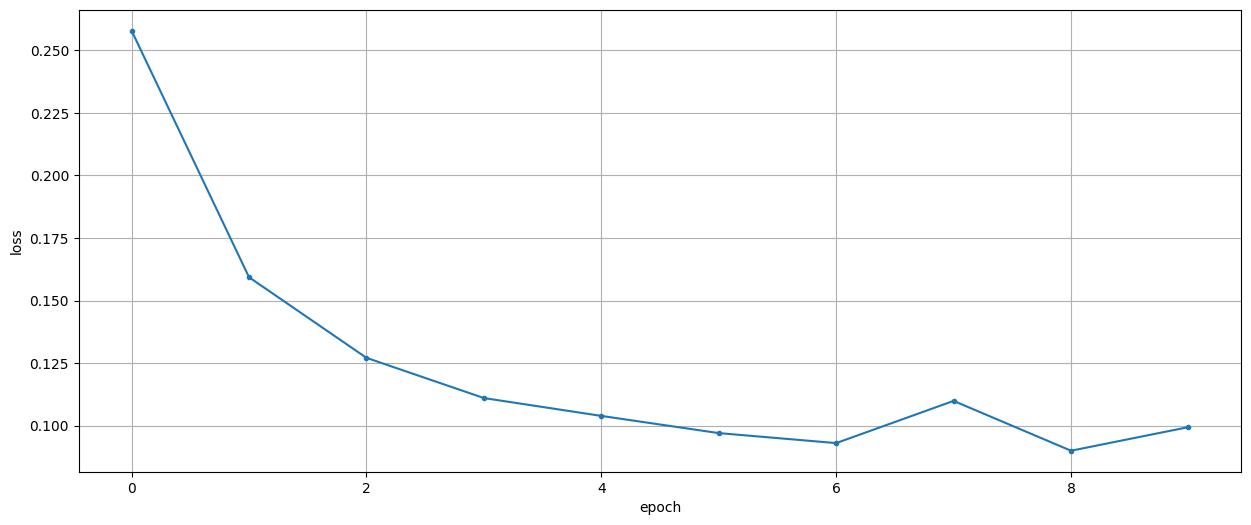

In [12]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [13]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 [==============================] - 0s 66ms/step
[[-0.02481402]] 0


In [14]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 [==============================] - 0s 955us/step


In [15]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9588366890380313


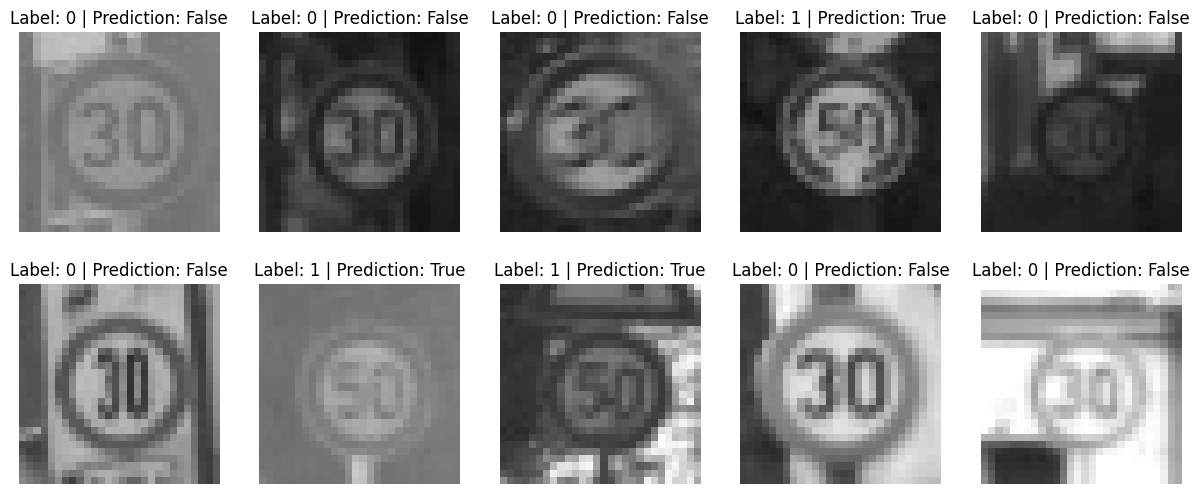

In [16]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

## New model 

In [17]:
inputs = Input(shape=(pixels.shape[1],))
dense1 = Dense(64, activation="relu")(inputs)
# dropout1 = Dropout(rate=0.5)(dense1)  # Видаляємо цей Dropout шар
dense2 = Dense(64, activation="relu")(dense1)
# dropout2 = Dropout(rate=0.5)(dense2)  # Видаляємо цей Dropout шар
outputs = Dense(1, activation="linear")(dense2)

model = Model(inputs, outputs)

model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 54465 (212.75 KB)
Trainable params: 54465 (212.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


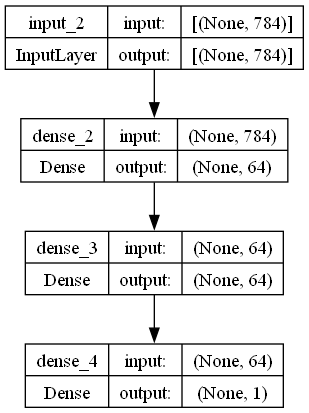

In [18]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(pixels, labels, epochs=10, batch_size=32)

# Evaluate the model
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

correct = np.sum(predictions == labels)
accuracy = correct / len(labels)
print('Accuracy:', accuracy)


Epoch 1/10
140/140 [==============================] - 1s 2ms/step - loss: 0.2484
Epoch 2/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1570
Epoch 3/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1111
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1019
Epoch 5/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0864
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0864
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0692
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0715
Epoch 9/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 10/10
140/140 [==============================] - 0s 1ms/step
Accuracy: 0.959731543624161
